In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from autoencoder import Autoencoder
from tensorflow.python.keras.losses import MeanSquaredError
from tensorflow.keras.datasets import mnist

2025-07-30 22:12:13.267561: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-30 22:12:13.934834: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753884734.152591    1871 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753884734.226772    1871 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753884734.809124    1871 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [28]:

def select_images(images, labels, num_images=10):
    sample_images_index = np.random.choice(range(len(images)), num_images)
    sample_images = images[sample_images_index]
    sample_labels = labels[sample_images_index]
    return sample_images, sample_labels


def plot_reconstructed_images(images, reconstructed_images):
    fig = plt.figure(figsize=(10, 3))
    num_images = len(images)
    for i, (image, reconstructed_image) in enumerate(zip(images, reconstructed_images)):
        image = image.squeeze()
        ax = fig.add_subplot(2, num_images, i + 1)
        ax.axis("off")
        ax.imshow(image, cmap="gray_r")
        reconstructed_image = reconstructed_image.squeeze()
        ax = fig.add_subplot(2, num_images, i + num_images + 1)
        ax.axis("off")
        ax.imshow(reconstructed_image, cmap="gray_r")
    plt.show()


def plot_images_encoded_in_latent_space(latent_representations, sample_labels):
    plt.figure(figsize=(7, 5))
    plt.scatter(latent_representations[:, 0],
                latent_representations[:, 1],
                cmap="rainbow",
                c=sample_labels,
                alpha=0.5,
                s=2)
    plt.colorbar()
    plt.show()

In [3]:
autoencoder = load_model("full_autoencoder_model.keras", custom_objects={"MeanSquaredError": MeanSquaredError})
encoder = load_model("encoder_autoencoder_model.keras", custom_objects={"MeanSquaredError": MeanSquaredError})
decoder = load_model("decoder_autoencoder_model.keras", custom_objects={"MeanSquaredError": MeanSquaredError})

I0000 00:00:1753884740.386282    1871 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9711 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


In [31]:
(x_train_full, y_label_full), (x_test, y_label) = mnist.load_data()
x_all = np.concatenate([x_train_full, x_test], axis=0).astype("float32") / 255.0
y_label_all = np.concatenate([y_label_full, y_label], axis=0)
x_all = x_all[..., np.newaxis]

In [ ]:
num_sample_images_to_show = 10
sample_images, sample_labels = select_images(x_all, y_label_all, num_sample_images_to_show)

In [45]:
latent_representations = encoder.predict(sample_images)
reconstructed_images = decoder.predict(latent_representations)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


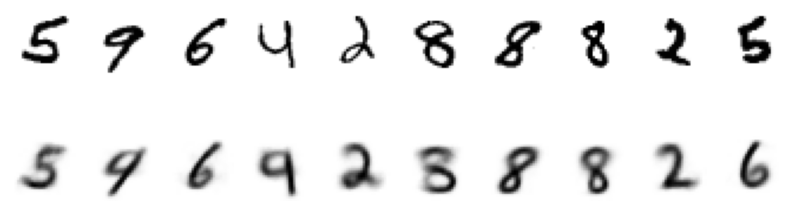

In [46]:
# Given that the latent space dimension is 2, the reconstructed images is pixe
plot_reconstructed_images(sample_images, reconstructed_images)

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


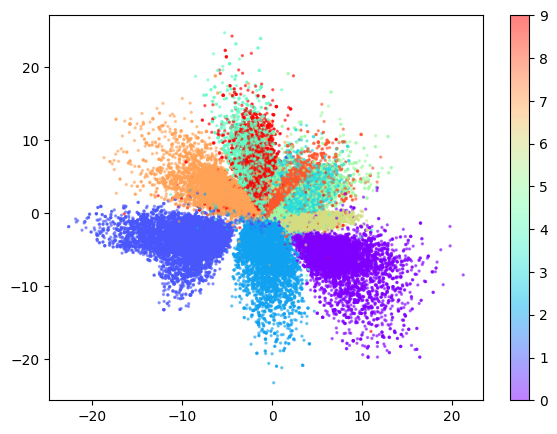

In [27]:
num_sample_images_to_show = len(x_all)
sample_images, sample_labels = select_images(x_all, y_label_all, num_sample_images_to_show)
latent_representations = encoder.predict(sample_images)
plot_images_encoded_in_latent_space(latent_representations, sample_labels)